# <span style='color:#FF8383'>Assignment 19</span>
## <span style='color:#6A9C89'>Natural Language Processing and Naive Bayes </span>

#### <span style='color:#6A9C89'>Overview </span>
    In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).
#### <span style='color:#6A9C89'>Dataset</span>
    The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:
    •	Text: The content of the blog post. Column name: Data
    •	Category: The category to which the blog post belongs. Column name: Labels


## <span style='color:#6A9C89'>Data Exploration and Preprocessing</span>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
print('IMPORTED')

IMPORTED


In [7]:
## loading the data
df = pd.read_csv('blogs.csv')
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [11]:
rows, columns = df.shape
print(f'Number of Columns = {columns}')
print(f'Number of Rows = {rows}')

Number of Columns = 2
Number of Rows = 2000


In [15]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## download stopwords
nltk.download('stopwords')
## set of stopword
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
## initializing Word Net Lemmatizer
lemmatizer = WordNetLemmatizer()

In [18]:
## let's build a function for pre-processing the data
def preprocess(text):
    ## remove all the other elements in the text and then put it in another variable
    corpus = re.sub(r"[^a-zA-Z\s]","", text)
    ## lowering the case
    corpus = corpus.lower()
    ## now tokenize the corpus to words
    words = word_tokenize(corpus)
    ## remove stop words
    words = [word for word in words if word not in stop_words]
    ## lemmatizing the words
    lemme_words = [lemmatizer.lemmatize(word) for word in words]
    ## removing words which are greater than 10 in lengths
    small_words = [word for word in lemme_words if len(word) <= 10]
    ## join the words to make a complete sentences
    return " ".join(small_words)

In [19]:
df['processed_data'] = df['Data'].apply(lambda x: preprocess(x))

In [20]:
df.head()

,Data,Labels,processed_data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path frank odwyer newsgroups altatheism subjec...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path bill conner subject...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path james hogan newsgroups altatheism subject...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path newsgroups altatheism subject death penal...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref altatheism newsgroups path subject rawlin...


In [26]:
## removing un-processe data
df.drop(columns=['Data'], inplace=True)
df.head()

,Labels,processed_data
0,alt.atheism,path frank odwyer newsgroups altatheism subjec...
1,alt.atheism,newsgroups altatheism path bill conner subject...
2,alt.atheism,path james hogan newsgroups altatheism subject...
3,alt.atheism,path newsgroups altatheism subject death penal...
4,alt.atheism,xref altatheism newsgroups path subject rawlin...


In [33]:
## let's verify number of unique characters in labels
print('='*50)
print('Number of unique variables present in Labels')
print('-'*50)
print(df['Labels'].nunique())
print('='*50)
print('Unique items in Lables')
print('-'*50)
print(df['Labels'].unique())
print('='*50)

Number of unique variables present in Labels
--------------------------------------------------
20
Unique items in Lables
--------------------------------------------------
['alt.atheism' 'comp.graphics' 'comp.os.ms-windows.misc'
 'comp.sys.ibm.pc.hardware' 'comp.sys.mac.hardware' 'comp.windows.x'
 'misc.forsale' 'rec.autos' 'rec.motorcycles' 'rec.sport.baseball'
 'rec.sport.hockey' 'sci.crypt' 'sci.electronics' 'sci.med' 'sci.space'
 'soc.religion.christian' 'talk.politics.guns' 'talk.politics.mideast'
 'talk.politics.misc' 'talk.religion.misc']


In [34]:
## value counts in Labels
df['Labels'].value_counts()

alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: Labels, dtype: int64

##### So, we can see that the data is completly balanced.

In [36]:
data = df.copy

In [38]:
## figuring out max features using vocabulary distribution
from collections import Counter
word_counts = Counter(" ".join(df['processed_data']).split())
print(len(word_counts))
print(word_counts.most_common(10))

27786
[('line', 2300), ('subject', 2176), ('date', 2092), ('path', 2049), ('newsgroups', 2040), ('messageid', 2006), ('apr', 1955), ('gmt', 1787), ('one', 1694), ('would', 1580)]


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
## initializing TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=2300, ngram_range = (1,5))
tfidf_features = tfidf.fit_transform(df['processed_data']).toarray()

In [61]:
tfidf_features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.04344838,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05613957, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [63]:
## vocabularies
tfidf.vocabulary_

{'path': 1447,
 'frank': 773,
 'odwyer': 1385,
 'newsgroups': 1340,
 'altatheism': 60,
 'subject': 1948,
 'islamic': 996,
 'genocide': 806,
 'date': 462,
 'apr': 104,
 'gmt': 818,
 'line': 1105,
 'world': 2254,
 'messageid': 1218,
 'reference': 1645,
 'article': 132,
 'jon': 1022,
 'livesey': 1123,
 'writes': 2268,
 'particular': 1439,
 'society': 1869,
 'case': 310,
 'uk': 2116,
 'murder': 1304,
 'kind': 1046,
 'say': 1753,
 'little': 1120,
 'whether': 2223,
 'allows': 54,
 'one': 1398,
 'nothing': 1372,
 'religion': 1683,
 'matter': 1186,
 'kill': 1043,
 'christian': 344,
 'bible': 213,
 'may': 1189,
 'certain': 322,
 'fact': 700,
 'id': 935,
 'majority': 1160,
 'people': 1465,
 'moral': 1284,
 'system': 1987,
 'get': 811,
 'allow': 52,
 'agree': 41,
 'thats': 2028,
 'rather': 1616,
 'depends': 532,
 'talk': 1995,
 'islam': 995,
 'least': 1081,
 'claim': 352,
 'go': 831,
 'general': 803,
 'statement': 1922,
 'fall': 707,
 'apart': 91,
 'could': 421,
 'believe': 205,
 'god': 834,
 'pa

In [69]:
## applying label encoder for the labels
from sklearn.preprocessing import LabelEncoder
## initializing label encoder
le = LabelEncoder()

In [70]:
## transforming label encoder
labelled_labels = le.fit_transform(df['Labels'])

In [71]:
labelled_labels

array([ 0,  0,  0, ..., 19, 19, 19])

## <span style='color:#6A9C89'>Naive Bayes Model for Text Classification</span>

In [113]:
## splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(tfidf_features,labelled_labels,test_size=0.20, random_state=42)

In [114]:
## shapes for the training and testing data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 2300), (400, 2300), (1600,), (400,))

In [115]:
## implementing naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [116]:
params = {
    'alpha':[x/10 for x in range(2,8)],
    'fit_prior' : [True, False]
}

In [117]:
## grid search CV for finding the best params
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    estimator= mnb,
    param_grid= params,
    cv = 5,
    scoring = 'accuracy',
)
grid.fit(x_train, y_train) ## fitting the model

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
                         'fit_prior': [True, False]},
             scoring='accuracy')

In [118]:
## best parameter for the model
grid.best_params_

{'alpha': 0.5, 'fit_prior': False}

In [119]:
## best model
best_model = grid.best_estimator_

In [120]:
best_model

MultinomialNB(alpha=0.5, fit_prior=False)

In [121]:
y_pred = best_model.predict(x_test)

In [122]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, confusion_matrix
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.62      0.83      0.71        18\n           1       0.50      0.50      0.50        18\n           2       0.62      0.68      0.65        22\n           3       0.77      0.68      0.72        25\n           4       0.63      0.57      0.60        21\n           5       0.64      0.64      0.64        25\n           6       0.75      0.50      0.60        18\n           7       0.77      0.94      0.85        18\n           8       0.81      0.81      0.81        16\n           9       0.56      0.83      0.67        18\n          10       0.76      0.87      0.81        15\n          11       0.90      1.00      0.95        19\n          12       0.44      0.50      0.47        16\n          13       0.94      0.94      0.94        17\n          14       0.95      0.90      0.93        21\n          15       0.82      1.00      0.90        23\n          16       0.78      0.64      0.71        28\n       

In [123]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  1],
       [ 0,  9,  4,  0,  1,  1,  0,  0,  0,  2,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0, 15,  2,  0,  4,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  2, 17,  2,  1,  1,  0,  0,  0,  0,  0,  2,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  1,  0,  2, 12,  1,  0,  0,  0,  1,  0,  0,  4,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  4,  3,  0,  0, 16,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  2,  0,  0,  3,  0,  9,  2,  0,  1,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 17,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 13,  0,  0,  0,  1,  0,  1,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 15,  3,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

In [124]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average = 'micro')
print(f'Accuracy Score => {accuracy}')
print(f'Precision Score => {precision}')
print(f'F1 Score => {f1}')

Accuracy Score => 0.73
Precision Score => 0.73
F1 Score => 0.73


## <span style='color:#6A9C89'>Sentiment Analysis</span>

#### <span style='color:#155E95'>Text Blog</span>

In [125]:
## using TextBlob
from textblob import TextBlob
def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [141]:
data_text_blob = df.copy()

In [142]:
data_text_blob.head()

,Labels,processed_data
0,alt.atheism,path frank odwyer newsgroups altatheism subjec...
1,alt.atheism,newsgroups altatheism path bill conner subject...
2,alt.atheism,path james hogan newsgroups altatheism subject...
3,alt.atheism,path newsgroups altatheism subject death penal...
4,alt.atheism,xref altatheism newsgroups path subject rawlin...


In [143]:
## apply sentiment analysis
data_text_blob['sentiment'] = data_text_blob['processed_data'].apply(get_sentiment)

In [144]:
data_text_blob.head()

,Labels,processed_data,sentiment
0,alt.atheism,path frank odwyer newsgroups altatheism subjec...,Positive
1,alt.atheism,newsgroups altatheism path bill conner subject...,Negative
2,alt.atheism,path james hogan newsgroups altatheism subject...,Positive
3,alt.atheism,path newsgroups altatheism subject death penal...,Positive
4,alt.atheism,xref altatheism newsgroups path subject rawlin...,Positive


In [145]:
## let's check sentiment count
data_text_blob.sentiment.value_counts()

Positive    1435
Negative     562
Neutral        3
Name: sentiment, dtype: int64

#### <span style='color:#155E95'>Using VADAR</span>

In [146]:
data_vader = df.copy()

In [148]:
## importing sentiment analysis from Vader
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
## download vader lexical analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [149]:
## initialize sentimental intensity analyzer
sia = SentimentIntensityAnalyzer()

In [150]:
def get_sentiment_vader(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] > 0.05:
        return "Positive"
    elif scores['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"

In [151]:
data_vader['sentiment'] = data_vader['processed_data'].apply(get_sentiment_vader)
data_vader.head()

,Labels,processed_data,sentiment
0,alt.atheism,path frank odwyer newsgroups altatheism subjec...,Negative
1,alt.atheism,newsgroups altatheism path bill conner subject...,Positive
2,alt.atheism,path james hogan newsgroups altatheism subject...,Negative
3,alt.atheism,path newsgroups altatheism subject death penal...,Negative
4,alt.atheism,xref altatheism newsgroups path subject rawlin...,Positive


In [152]:
## let's check the value count
data_vader.sentiment.value_counts()

Positive    1354
Negative     583
Neutral       63
Name: sentiment, dtype: int64

In [153]:
result = {
    'foundings' : ['Positive', 'Negative', 'Neutral'],
    'VADAR System' : [1354, 583, 63],
    'Text Blob System' : [1435, 562, 3]
}

In [154]:
result_df = pd.DataFrame(result)

In [155]:
result_df

,foundings,VADAR System,Text Blob System
0,Positive,1354,1435
1,Negative,583,562
2,Neutral,63,3


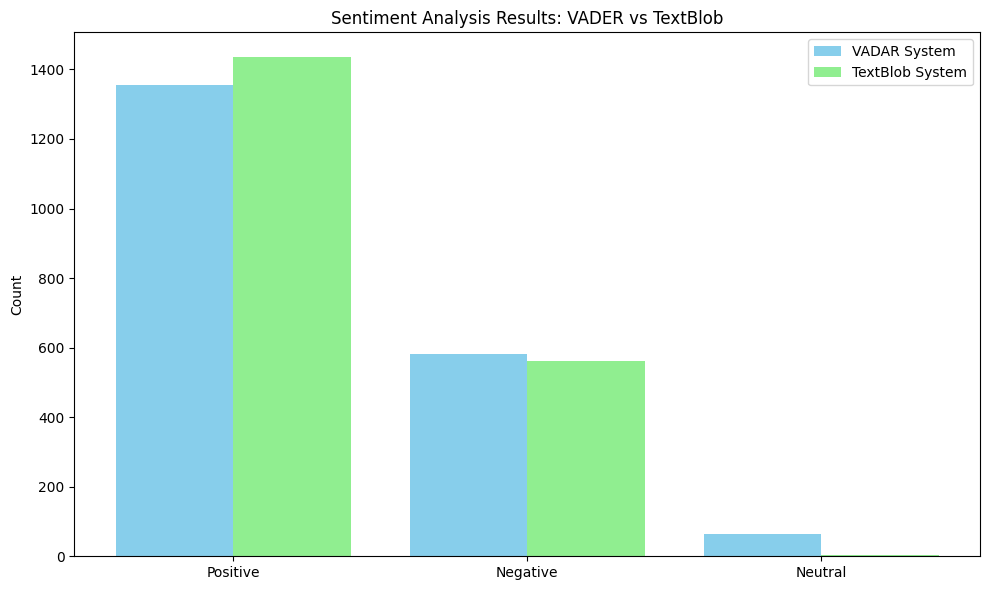

In [160]:
import matplotlib.pyplot as plt
import pandas as pd
## Data for visualization
result = {
    'foundings': ['Positive', 'Negative', 'Neutral'],
    'VADAR System': [1354, 583, 63],
    'Text Blob System': [1435, 562, 3]
}
result_df = pd.DataFrame(result)
## Define x-axis positions
x = range(len(result_df['foundings']))
bar_width = 0.4
## Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
# VADER System results
ax.bar(x, result_df['VADAR System'], width=bar_width, label='VADAR System', color='skyblue', align='center')
## TextBlob System results
ax.bar(
    [p + bar_width for p in x],
    result_df['Text Blob System'],
    width=bar_width,
    label='TextBlob System',
    color='lightgreen',
    align='center'
)
## Customize the plot
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(result_df['foundings'])
ax.set_title('Sentiment Analysis Results: VADER vs TextBlob')
ax.set_ylabel('Count')
ax.legend()
plt.tight_layout()
## Show the plot
plt.show()


## <span style='color:#6A9C89'>Evaluation</span>

#### <span style='color:#155E95'>Using Text Blob</span>

In [189]:
## before evaluation let's build another model for blob classification
x_blob = data_text_blob['processed_data']
y_bolb = data_text_blob['sentiment']

In [190]:
## let's preprocess the data
y_bolb = le.fit_transform(y_bolb)

In [191]:
## for dependent data
x_blob = tfidf.fit_transform(x_blob).toarray()

In [192]:
## splitting the data 
x_train_blob, x_test_blob, y_train_blob, y_test_blob = train_test_split(x_blob,y_bolb,test_size=0.2,random_state=42)

In [193]:
model_text_blob = MultinomialNB(alpha= 0.5, fit_prior= False)

In [194]:
## training the data
model_text_blob.fit(x_train_blob, y_train_blob)

MultinomialNB(alpha=0.5, fit_prior=False)

In [195]:
## prediction 
y_pred_blob = model_text_blob.predict(x_test_blob)

In [196]:
classification_report(y_pred_blob, y_test_blob)

'              precision    recall  f1-score   support\n\n           0       0.59      0.47      0.53       131\n           1       0.00      0.00      0.00         5\n           2       0.75      0.84      0.79       264\n\n    accuracy                           0.71       400\n   macro avg       0.45      0.44      0.44       400\nweighted avg       0.69      0.71      0.69       400\n'

In [197]:
accuracy = accuracy_score(y_test_blob, y_pred_blob)
precision = precision_score(y_test_blob, y_pred_blob, average='micro')
f1 = f1_score(y_test_blob, y_pred_blob, average = 'micro')
print(f'Accuracy Score => {accuracy}')
print(f'Precision Score => {precision}')
print(f'F1 Score => {f1}')

Accuracy Score => 0.7075
Precision Score => 0.7075
F1 Score => 0.7075


#### <span style='color:#155E95'>Using VADAR</span>

In [186]:
## before evaluation let's build another model for vader classification
x_vader = data_vader['processed_data']
y_vader = data_vader['sentiment']

In [198]:
## let's preprocess the data
y_vader = le.fit_transform(y_vader)

In [199]:
## for dependent data
x_vader = tfidf.fit_transform(x_vader).toarray()

In [200]:
## splitting the data 
x_train_vader, x_test_vader, y_train_vader, y_test_vader = train_test_split(x_vader,y_vader,test_size=0.2,random_state=42)

In [201]:
model_text_blob = MultinomialNB(alpha= 0.5, fit_prior= False)

In [202]:
## training the data
model_text_blob.fit(x_train_vader, y_train_vader)

MultinomialNB(alpha=0.5, fit_prior=False)

In [203]:
## prediction 
y_pred_vader = model_text_blob.predict(x_test_vader)

In [204]:
accuracy = accuracy_score(y_test_vader, y_pred_vader)
precision = precision_score(y_test_vader, y_pred_vader, average='micro')
f1 = f1_score(y_test_vader, y_pred_vader, average = 'micro')
print(f'Accuracy Score => {accuracy}')
print(f'Precision Score => {precision}')
print(f'F1 Score => {f1}')

Accuracy Score => 0.7075
Precision Score => 0.7075
F1 Score => 0.7075


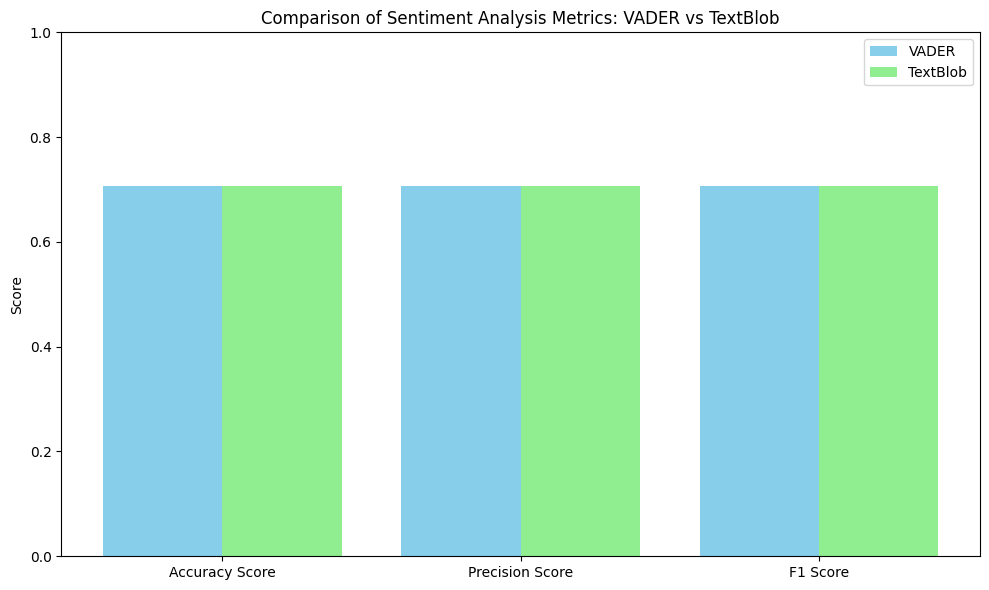

In [205]:
import numpy as np
## Metrics data
metrics = ['Accuracy Score', 'Precision Score', 'F1 Score']
vader_scores = [0.7075, 0.7075, 0.7075]
textblob_scores = [0.7075, 0.7075, 0.7075]
# Positions for the bars
x = np.arange(len(metrics))
bar_width = 0.4
# Plot the metrics
fig, ax = plt.subplots(figsize=(10, 6))
# VADER scores
ax.bar(x - bar_width / 2, vader_scores, width=bar_width, label='VADER', color='skyblue')
# TextBlob scores
ax.bar(x + bar_width / 2, textblob_scores, width=bar_width, label='TextBlob', color='lightgreen')
# Customizing the plot
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.set_title('Comparison of Sentiment Analysis Metrics: VADER vs TextBlob')
ax.set_ylabel('Score')
ax.legend()
# Show the plot
plt.tight_layout()
plt.show()

### <span style='color:#155E95'>Discussion on Model Performance and Challenges</span>
#### <span style='color:#155E95'>Model Performance</span>
##### <span style='color:#155E95'>The Naive Bayes classifier performed reasonably well, achieving consistent metrics:</span>
    Accuracy, Precision, F1 Score: 0.7075
##### <span style='color:#155E95'>Challenges</span>
    Data Preprocessing: Cleaning, tokenizing, and managing imbalanced categories was challenging.
    Feature Selection: Finding the optimal max_features for TF-IDF required experimentation.
    Sentiment Ambiguity: Differences in tools (VADER vs. TextBlob) highlighted subjectivity in text sentiment.
#### <span style='color:#155E95'>Reflection on Sentiment Analysis Results</span>

##### <span style='color:#155E95'>Sentiment Insights</span>
    Most posts had positive sentiment, reflecting uplifting or motivational content.
    VADER captured more neutral tones than TextBlob, which skewed towards positive sentiments.

#### <span style='color:#155E95'>Implications</span>
    Blogs focus on optimism, with a smaller share of critical or neutral topics.
    Tools struggled with nuanced or mixed sentiments, affecting accuracy.

#### <span style='color:#155E95'>Conclusion</span>
    The project highlighted the strengths and limitations of Naive Bayes and sentiment analysis tools, emphasizing the need for advanced NLP methods to improve handling of nuanced content.